In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("hepatitis.csv")
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [3]:
df.replace('?', np.nan, inplace=True)

# Convert to proper dtypes
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

# Drop rows with missing or invalid values
df.dropna(inplace=True)

# Remove rows with negative values from numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns
df = df[(df[num_cols] >= 0).all(axis=1)]

In [5]:
# Separate features and target
X = df.drop('class', axis=1)
y = df['class']  # 1 = Die, 2 = Live

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling complete. Shape:", X_scaled.shape)

Scaling complete. Shape: (142, 19)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# ---- Logistic Regression ----
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [20]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

           1       0.40      0.67      0.50         3
           2       0.96      0.88      0.92        26

    accuracy                           0.86        29
   macro avg       0.68      0.78      0.71        29
weighted avg       0.90      0.86      0.88        29



Text(50.722222222222214, 0.5, 'Actual')

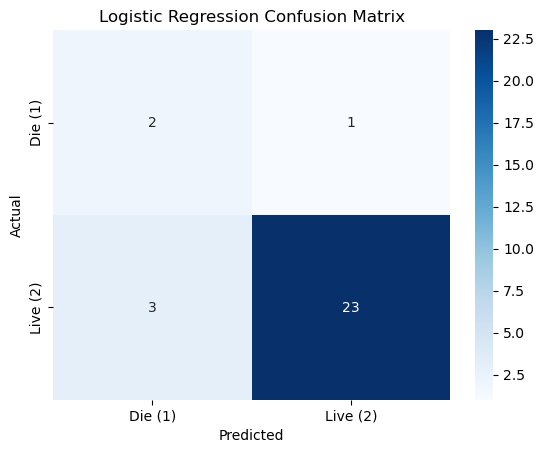

In [25]:
cm_log = confusion_matrix(y_test, y_pred_log)
labels = ['Die (1)', 'Live (2)']

# Logistic Regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [23]:
# ---- Naive Bayes ----
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6551724137931034
              precision    recall  f1-score   support

           1       0.18      0.67      0.29         3
           2       0.94      0.65      0.77        26

    accuracy                           0.66        29
   macro avg       0.56      0.66      0.53        29
weighted avg       0.87      0.66      0.72        29



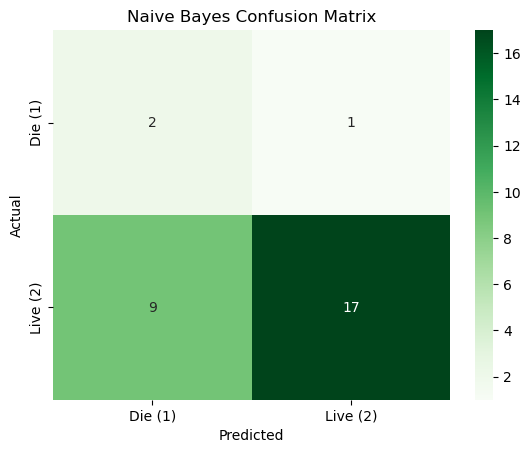

In [24]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()